In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
ames = pd.read_csv('./datasets/train.csv')

In [3]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#checking for anything weird like negative values
ames.describe().T;
#output blockd for readibility
#nothing to note

In [5]:
#check for missing values
ames.isnull().sum();

In [6]:
ames.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
#see what columns are missing data
missing = {}
for col in ames.columns:
    n = ames[col].isnull().sum()
    if n > 0:
        missing[col] = n
missing

{'Lot Frontage': 330,
 'Alley': 1911,
 'Mas Vnr Type': 22,
 'Mas Vnr Area': 22,
 'Bsmt Qual': 55,
 'Bsmt Cond': 55,
 'Bsmt Exposure': 58,
 'BsmtFin Type 1': 55,
 'BsmtFin SF 1': 1,
 'BsmtFin Type 2': 56,
 'BsmtFin SF 2': 1,
 'Bsmt Unf SF': 1,
 'Total Bsmt SF': 1,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Fireplace Qu': 1000,
 'Garage Type': 113,
 'Garage Yr Blt': 114,
 'Garage Finish': 114,
 'Garage Cars': 1,
 'Garage Area': 1,
 'Garage Qual': 114,
 'Garage Cond': 114,
 'Pool QC': 2042,
 'Fence': 1651,
 'Misc Feature': 1986}

In [8]:
# data cleaning start with Lot Frontage use SLR to fill in values

In [9]:
#Start by checking for liner relationship between lot area and frontage
#sns.scatterplot(ames['Lot Frontage'], ames['Lot Area']);

In [10]:
ames['logfoot'] = np.log(ames['Lot Frontage'])
ames['logarea'] = np.log(ames['Lot Area'])

In [11]:
#try log to noramlize
#sns.scatterplot(ames['logfoot'], ames['logarea']);

In [12]:
#seperate missing values
lot_train = ames[ames['Lot Frontage'].isnull() == False]
lot_null = ames[ames['Lot Frontage'].isnull() == True]

In [13]:
#fit linear modelb
lr = LinearRegression()
X = lot_train[['logarea']]
y = lot_train['logfoot']
lr.fit(X,y);

In [14]:
#add in predictions
lot_null['logfoot'] = lr.predict(lot_null[['logarea']])

C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
ames = pd.concat([lot_train,lot_null])

In [16]:
ames['Lot Frontage'] = np.exp(ames['logfoot'])

In [17]:
ames['Lot Frontage'].isnull().sum()

0

In [18]:
ames.drop(columns=['logfoot','logarea'], inplace=True);

In [19]:
#Lot frontage values filled in with regression
#For many variables NA had meaning and was replaced with a string for convience
#for some vlaues were filled in with most common value for that subtype

ames.loc[(ames['BsmtFin Type 2'].isnull()==True) & (ames['Bsmt Qual']=='Gd'), 'BsmtFin Type 2'] = 'Unf'
ames.loc[(ames['Garage Finish'].isnull()==True) & (ames['Garage Type']=='Detchd'), 'Garage Finish'] = 'Unf'
ames.loc[(ames['Bsmt Exposure'].isnull()==True) & (ames['Bsmt Qual']!='None'), 'Bsmt Exposure'] = 'No'
ames.loc[(ames['Garage Area'].isnull()==True) & (ames['Garage Type']=='Detchd'), 'Garage Area'] = 410.0

ames['Mas Vnr Type'].replace(np.nan,value='None',inplace=True)
ames['Mas Vnr Area'].replace(np.nan,value=0,inplace=True)
ames['Fireplace Qu'].replace(np.nan,value='None',inplace=True)
ames['Bsmt Qual'].replace(np.nan,value='None',inplace=True)
ames['Bsmt Exposure'].replace(np.nan,value='None',inplace=True)
ames['BsmtFin Type 1'].replace(np.nan,value='No Basement',inplace=True)
ames['BsmtFin SF 1'].replace(np.nan,value=0,inplace=True)
ames['Garage Type'].replace(np.nan,value='No Garage',inplace=True)
ames['Garage Finish'].replace(np.nan,value='No Garage',inplace=True)
ames['Alley'].replace(np.nan,value='No Alley Access',inplace=True)
ames['Bsmt Cond'].replace(np.nan,value='No Basement',inplace=True)
ames['BsmtFin SF 2'].replace(np.nan,value=0,inplace=True)
ames['Bsmt Unf SF'].replace(np.nan,value=0,inplace=True)
ames['Total Bsmt SF'].replace(np.nan,value=0,inplace=True)
ames['BsmtFin Type 2'].replace(np.nan,value='No Basement',inplace=True)
ames['Bsmt Full Bath'].replace(np.nan,value=0,inplace=True)
ames['Bsmt Half Bath'].replace(np.nan,value=0,inplace=True)
ames['Pool QC'].replace(np.nan,value='No Pool',inplace=True)
ames['Fence'].replace(np.nan,value='No Fence',inplace=True)
ames['Misc Feature'].replace(np.nan,value='None',inplace=True)
ames['Garage Yr Blt'].replace(np.nan,value=0,inplace=True)
ames['Garage Qual'].replace(np.nan,value=0,inplace=True)
ames['Garage Cond'].replace(np.nan,value=0,inplace=True)
ames['Garage Cars'].replace(np.nan,value=0,inplace=True)



In [20]:
view1 = ames[ames['Bsmt Exposure'].isnull()==True]
view1[['Bsmt Exposure','Bsmt Qual']];
#There's 3 that clearly have a basement but have NA list which means no basement

In [21]:
view2 = ames[ames['BsmtFin SF 1'].isnull()==True]
view2[['Bsmt Qual','BsmtFin Type 1','BsmtFin SF 1',]];

In [22]:
view3 = ames[ames['Garage Finish'].isnull()==True]
view3[['Garage Finish','Garage Type']];
#theres a detached that doesn't have a finish

In [23]:
ames.groupby('Garage Type')['Garage Finish'].value_counts();

In [24]:
view4 = ames[ames['Garage Area'].isnull()==False]
view4[['Garage Area','Garage Type']];
#it also had an area so replace with mean because lazy

In [25]:
ames.groupby(['Garage Type','Garage Finish'])['Garage Area'].mean();

In [26]:
view5 = ames[ames['BsmtFin Type 2'].isnull()==True]
view5[['Bsmt Qual','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF']];

In [27]:
ames.groupby('Bsmt Qual')['BsmtFin Type 2'].value_counts();

In [28]:
view6 = ames[ames['Bsmt Full Bath'].isnull()==True]
view6[['Bsmt Full Bath', 'Bsmt Half Bath']];

In [29]:
view7 = ames[ames['Garage Yr Blt'].isnull()==True]
view7[['Garage Yr Blt', 'Garage Qual', 'Garage Cond']];

In [30]:
view8 = ames[ames['Garage Cars'].isnull()==True]
view8[['Garage Yr Blt', 'Garage Qual', 'Garage Cond']];

In [31]:
missing = {}
for col in ames.columns:
    n = ames[col].isnull().sum()
    if n > 0:
        missing[col] = n
missing

{}

In [32]:
ames.to_csv('cleaned.csv')

In [34]:
#remove outliers
nums = ames.select_dtypes(include=[np.number])
    

In [35]:
nums.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [136]:

print(ames.shape)
mean = np.mean(nums[nums.columns[i]])
std = np.std(nums[nums.columns[i]])

thres = mean + std*4

ames = ames[(ames[nums.columns[i]] <= thres) & (ames[nums.columns[i]] >= -1*thres)]
print(ames.shape)

(1969, 81)
(1959, 81)


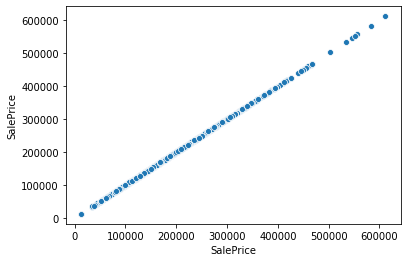

In [154]:
i = 38
sns.scatterplot(x=ames['SalePrice'], y=ames[nums.columns[i]])

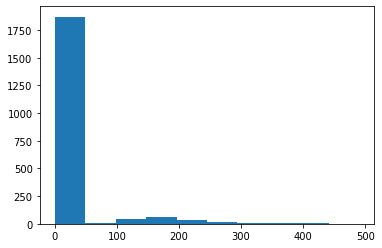

In [146]:
plt.hist(nums[nums.columns[i]]);

C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: supplied range of [-inf, 8.71768205216564] is not finite

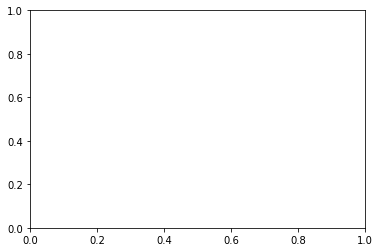

In [90]:
plt.hist(np.log(nums[nums.columns[i]]));